# The supervised learning workflow

Recall that scikit-learn offers a repeatable workflow for using supervised learning models to predict the target variable values when presented with new data.

Reorder the pseudo-code provided so it accurately represents the workflow of building a supervised learning model and making predictions.

Instructions

Drag the code blocks into the correct order to represent how a supervised learning workflow would be executed.

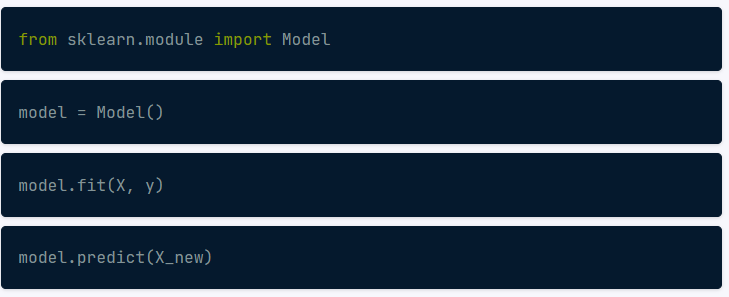

k-Nearest Neighbors: Fit
-
In this exercise, you will build your first classification model using the churn_df dataset, which has been preloaded for the remainder of the chapter.

The features to use will be "account_length" and "customer_service_calls". The target, "churn", needs to be a single column with the same number of observations as the feature data.

You will convert the features and the target variable into NumPy arrays, create an instance of a KNN classifier, and then fit it to the data.

numpy has also been preloaded for you as np.


Import KNeighborsClassifier from sklearn.neighbors.

Create an array called X containing values from the "account_length" and "customer_service_calls" columns, and an array called y for the values of the "churn" column.

Instantiate a KNeighborsClassifier called knn with 6 neighbors.

Fit the classifier to the data using the .fit() method.

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

k-Nearest Neighbors: Predict
-
Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

X_new = np.array([[30.0, 17.5],

                  [107.0, 24.1],
                  
                  [213.0, 10.9]])

Instructions

Create y_pred by predicting the target values of the unseen features X_new.

Print the predicted labels for the set of predictions.

In [ ]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Train/test split + computing accuracy
-
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the churn_df dataset!

NumPy arrays have been created for you containing the features as X and the target variable as y. You will split them into training and test sets, fit a KNN classifier to the training data, and then compute its accuracy on the test data using the .score() method.

Instructions

Import train_test_split from sklearn.model_selection.
Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
Fit the knn model to the training data.
Compute and print the model's accuracy for the test data.

In [ ]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

Overfitting and underfitting
-
Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different n_neighbor values, which you will plot in the next exercise.

The training and test sets have been created from the churn_df dataset and preloaded as X_train, X_test, y_train, and y_test.

In addition, KNeighborsClassifier has been imported for you along with numpy as np.

Instructions

Create neighbors as a numpy array of values from 1 up to and including 12.

Instantiate a KNN classifier, with the number of neighbors equal to the neighbor iterator.

Fit the model to the training data.

Calculate accuracy scores for the training set and test set separately using the .score() method, and assign the results to the index of the train_accuracies and test_accuracies dictionaries, respectively.

In [ ]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
  	# Set up a KNN Classifier
  	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
  	# Fit the model
  	knn.fit(X_train, y_train)
  
  	# Compute accuracy
  	train_accuracies[neighbor] = knn.score(X_train, y_train)
  	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

Visualizing model complexity
-
Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables neighbors, train_accuracies, and test_accuracies, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

Instructions

Add a title "KNN: Varying Number of Neighbors".

Plot the .values() method of train_accuracies on the y-axis against neighbors on the x-axis, with a label of "Training Accuracy".

Plot the .values() method of test_accuracies on the y-axis against neighbors on the x-axis, with a label of "Testing Accuracy".

Display the plot.

In [ ]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

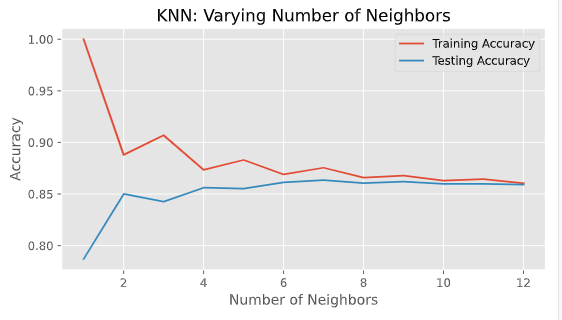